In [1]:
import pickle

ts = pickle.load(open('../../PNC_Good/PNC_SPM_emoid.pkl', 'rb'))
demo = pickle.load(open('../../PNC_Good/PNC_agesexwrat.pkl', 'rb'))

print(len(list(ts.keys())))
print(list(demo.keys()))

1500
['age', 'sex', 'wrat', 'missingage', 'missingsex', 'missingwrat', 'failedqc']


In [5]:
import numpy as np

x = []
y = []

for sub in demo['age'].keys():
    try:
        x.append(ts[str(sub)])
#         y.append(demo['sex'][sub] == 'M')
        y.append(demo['age'][sub])
    except KeyError as e:
        print(f'Not found {sub}')
    
x = np.stack(x)
y = np.stack(y)

print(x.shape)
print(y.shape)
print(y[0:2])

Not found 600879588780
Not found 603147935435
Not found 603245669207
Not found 604170546315
Not found 604390537221
Not found 604499247593
Not found 604560238992
Not found 608533037752
Not found 601158669657
Not found 601746465923
Not found 603017867359
Not found 603582836872
Not found 604063558268
Not found 605089033284
Not found 605403737627
Not found 606688736331
Not found 608993302629
Not found 609258037904
(926, 264, 210)
(926,)
[116 187]


In [6]:
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = [cutoff[0] / nyq, cutoff[1] / nyq]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

tr = 3

a,b = np.triu_indices(264,1)
ps = []
ys = []

for xi,yi in zip(x,y):
    xi = butter_bandpass_filter(xi, [0.01, 0.15], 1/tr)
    p = np.corrcoef(xi)
    if np.sum(np.isnan(p)) > 0:
        continue
    ps.append(p[a,b])
    ys.append(yi)

ys = np.stack(ys)
ps = np.stack(ps)

print(ps.shape)
print(ys.shape)
print('Done')

(926, 34716)
(926,)
Done


In [13]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split

def rmse(a,b):
    return np.mean((a-b)**2)**0.5

accs = []
for i in range(50):
    xtr, xt, ytr, yt = train_test_split(ps, ys, train_size=0.8)
    
#     mu = np.mean(ytr)
#     ytr = ytr-mu
#     yt = yt-mu

    reg = Ridge().fit(xtr, ytr)
    yhat = reg.predict(xt)
    acc = rmse(yhat, yt)
    print(acc)
    accs.append(acc)
    
#     clf = LogisticRegression(max_iter=1000).fit(xtr, ytr)
#     yhat = clf.predict(xt)
#     acc = np.mean(yhat == yt)
#     print(acc)
#     accs.append(acc)
    
print('---')
print(np.mean(accs))
print(np.std(accs))

25.780905467626734
26.98486362796334
26.020832001980835
26.356466367040237
25.599375472919977
25.337201567960008
27.505209688205877
25.779520514367196
25.770687349039772
26.21406516658156
25.72558110207211
24.887332251419693
27.124903063682343
26.368510478637578
27.71328911080998
25.285373078130704
28.26957394703542
26.916320990769293
24.54720092779575
27.898536221990323
28.76850006663704
28.116092738735
28.15419660088215
27.36652664790407
23.82581893245097
26.7531145974608
26.861759317088467
28.700827545104804
27.082100175324516
27.689949730480496
25.74587272809129
29.86043859045718
27.431394781611576
27.413406585349488
27.637241890799498
28.604026381176155
24.90989579329908
26.37911676110991
26.259668076356405
26.84770551601523
27.642268821640034
27.423084999790053
26.634449295945572
27.307790556256467
25.441208425235693
26.319384644037697
25.826974166011073
26.85016207250732
27.17528103582752
28.267037637264774
---
26.78762087013758
1.2010998358817235


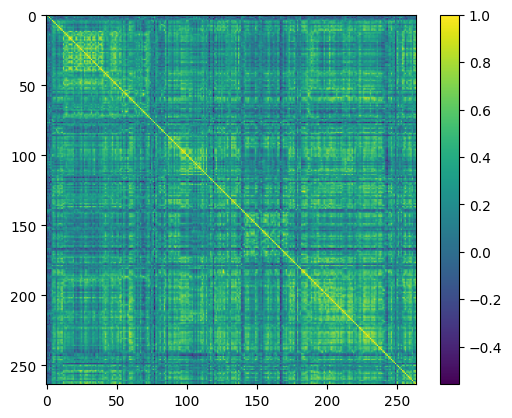

In [7]:
import matplotlib.pyplot as plt

plt.imshow(p)
plt.colorbar()
plt.show()